In [220]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy import io, signal, stats
import sys
sys.path.append('../')

from nlds.data_utils import load_mouse_data, sim_lorenz
from nlds.plotting import plot_trajectory
import nlds.delayembed as de
# import pyEDM as edm
# import pandas as pd

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


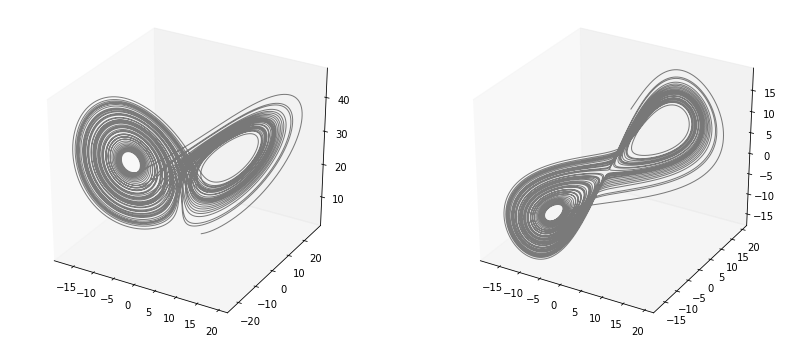

In [63]:
T, fs = 60, 1000
xinit = np.random.randint(0,10,size=3)
x,y,z=sim_lorenz(T, fs, xinit)
x_embed = de.delay_embed(x,70,3)
plt.figure(figsize=(14,6))
ax = plt.subplot(1,2,1, projection='3d')
plot_trajectory(np.array([x,y,z]).T, ax, alpha=0.5);
ax = plt.subplot(1,2,2, projection='3d')
plot_trajectory(x_embed, ax, alpha=0.5);

In [396]:
datafolder = '/Users/rdgao/Documents/data/Stringer_neuropixel/spikes/'
df_spk, df_info = load_mouse_data(datafolder, 0, return_type='smoothed', bin_width=0.1, smooth_param=[2,0.2])

Grabbing Spikes...
Binning Spikes...
Smoothing...


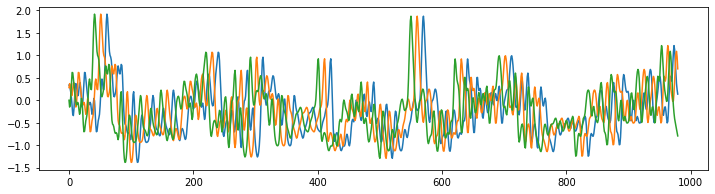

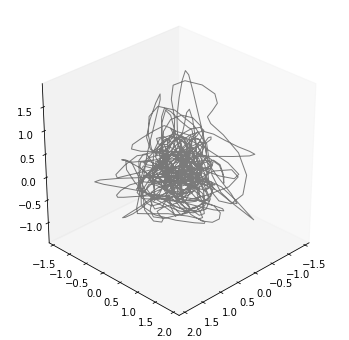

In [464]:
pop_rate = stats.zscore(df_spk.sum(1).values)
t = df_spk.index.values
#x_embed = de.delay_embed(np.log10(df_spk[0].values[0:10000]+1e-6),20,3)
#x_embed = de.delay_embed(df_spk[50].values[:5000],5,3)
x_embed = de.delay_embed(pop_rate[5000:6000],10,3)
plt.figure(figsize=(12,3))
plt.plot(x_embed)
plt.figure(figsize=(6,6))
ax = plot_trajectory(x_embed, step=1, alpha=0.5);
ax.view_init(elev=30., azim=45)

In [465]:
x = pop_rate
del_R, rel_R = de.compute_nn_dist(x,10,10)
dim, pfnn = de.PFNN(x,10,10)

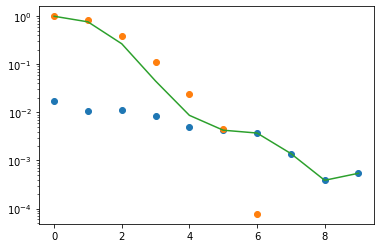

In [470]:
plt.plot((rel_R>2).sum(0)/rel_R.shape[0], 'o')
plt.plot((del_R>10).sum(0)/rel_R.shape[0], 'o')
plt.plot(pfnn)
plt.yscale('log')

In [447]:
del_R[np.isnan(del_R[:,0]),0]=0

In [443]:
np.array(1)/np.array(0)

/Users/rdgao/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.


inf